In [4]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

print(f"TF version: {tf.__version__}")
print(f"TFP version: {tfp.__version__}")

TF version: 2.4.0
TFP version: 0.12.1


In [5]:
import matplotlib.pyplot as plt
import numpy as np
tf.random.set_seed(123)

## Tensorflow Distributions
- Univariate Distributions
- Multivariate Disributions
- The Independent Distributions
- Sampling and Log Probs
- Trainable Distributions

### Univariate Distribution

- Batch shape and event shape shows it is a single scaler distributions
- Draw samples

In [7]:
normal = tfd.Normal(loc=0, scale=1)
normal

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

In [8]:
normal.sample()

<tf.Tensor: shape=(), dtype=float32, numpy=-0.8980837>

In [9]:
normal.sample(10)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 0.33875433,  0.3449861 , -0.6605785 , -0.2854994 ,  0.43852386,
        0.8288566 , -0.53591555, -0.5353483 , -1.0324248 , -2.942705  ],
      dtype=float32)>

In [11]:
# Obtain value of Probability's Density
normal.prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.3989423>

In [12]:
# Obtain Log Probability
normal.log_prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385>

In [13]:
# Verify this is really a log probability
np.log(normal.prob(0))

-0.9189385

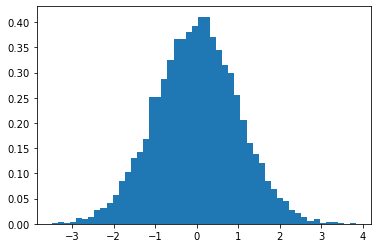

In [14]:
# Plot a histogram, approximating the density
plt.hist(normal.sample(10000), bins=50, density=True)
plt.show()

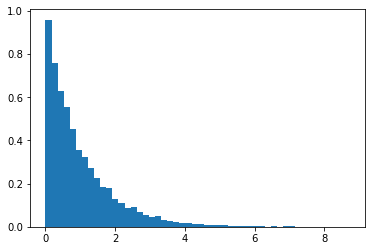

In [20]:
# Do the smae for the exponential distribution
exponential = tfd.Exponential(rate=1)
plt.hist(exponential.sample(10000), bins=50, density=True)
plt.show()

In [17]:
# Create a discrete Bernoulli's Distribution (It will ouput 1)
bernoulli = tfd.Bernoulli(probs=0.8)
bernoulli.sample(20)

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0],
      dtype=int32)>

In [18]:
# Calculate Bernoulli prob and see that 0.5 and -1 do not give the correct probability
for k in [0, 0.5, 1, -1]:
    print(f'Prob result {bernoulli.prob(k)} for k = {k}')

Prob result 0.19999998807907104 for k = 0
Prob result 0.3999999761581421 for k = 0.5
Prob result 0.800000011920929 for k = 1
Prob result 0.04999999701976776 for k = -1


In [21]:
# Replicate the scores to see what is occuring under the hood
def my_bernoulli(p_success, k):
    return np.power(p_success, k) * np.power((1-p_success), (1-k))

In [22]:
for k in [0, 0.5, 1, -1]:
    print(f'Prob result {my_bernoulli(p_success=0.8, k=k)} for k = {k}')

Prob result 0.19999999999999996 for k = 0
Prob result 0.3999999999999999 for k = 0.5
Prob result 0.8 for k = 1
Prob result 0.049999999999999975 for k = -1


## Batch Distributions

In [24]:
# Create a batched Bernoulli Distribution
bernoulli_batch = tfd.Bernoulli(probs=[0.1, 0.25, 0.5, 0.75, 0.9])
bernoulli_batch


<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[5] event_shape=[] dtype=int32>

In [27]:
bernoulli_batch.sample(1)

<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[0, 0, 1, 1, 1]], dtype=int32)>

In [29]:
bernoulli_batch.sample(3)

<tf.Tensor: shape=(3, 5), dtype=int32, numpy=
array([[1, 0, 1, 0, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1]], dtype=int32)>

In [30]:
# Use a batch shape with higher rang
probs = [[[0.5, 0.5], [0.8, 0.3], [0.25, 0.75] ]]

bernoulli_batch_2D = tfd.Bernoulli(probs=probs)
bernoulli_batch_2D

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[1, 3, 2] event_shape=[] dtype=int32>

In [31]:
bernoulli_batch_2D.sample(1)

<tf.Tensor: shape=(1, 1, 3, 2), dtype=int32, numpy=
array([[[[1, 0],
         [1, 0],
         [0, 0]]]], dtype=int32)>

In [32]:
bernoulli_batch_2D.sample(2)

<tf.Tensor: shape=(2, 1, 3, 2), dtype=int32, numpy=
array([[[[0, 1],
         [1, 1],
         [0, 1]]],


       [[[1, 1],
         [1, 1],
         [0, 1]]]], dtype=int32)>

In [33]:
bernoulli_batch_2D.prob([[[1, 0], [0, 0], [1, 1]]])

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[0.5       , 0.5       ],
        [0.19999999, 0.7       ],
        [0.25      , 0.75      ]]], dtype=float32)>